## Security analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_contract_bad = pd.read_csv("../csv_outputs/bad_tokens/master_security.csv")
df_contract_good = pd.read_csv("../csv_outputs/good_tokens/master_security.csv")


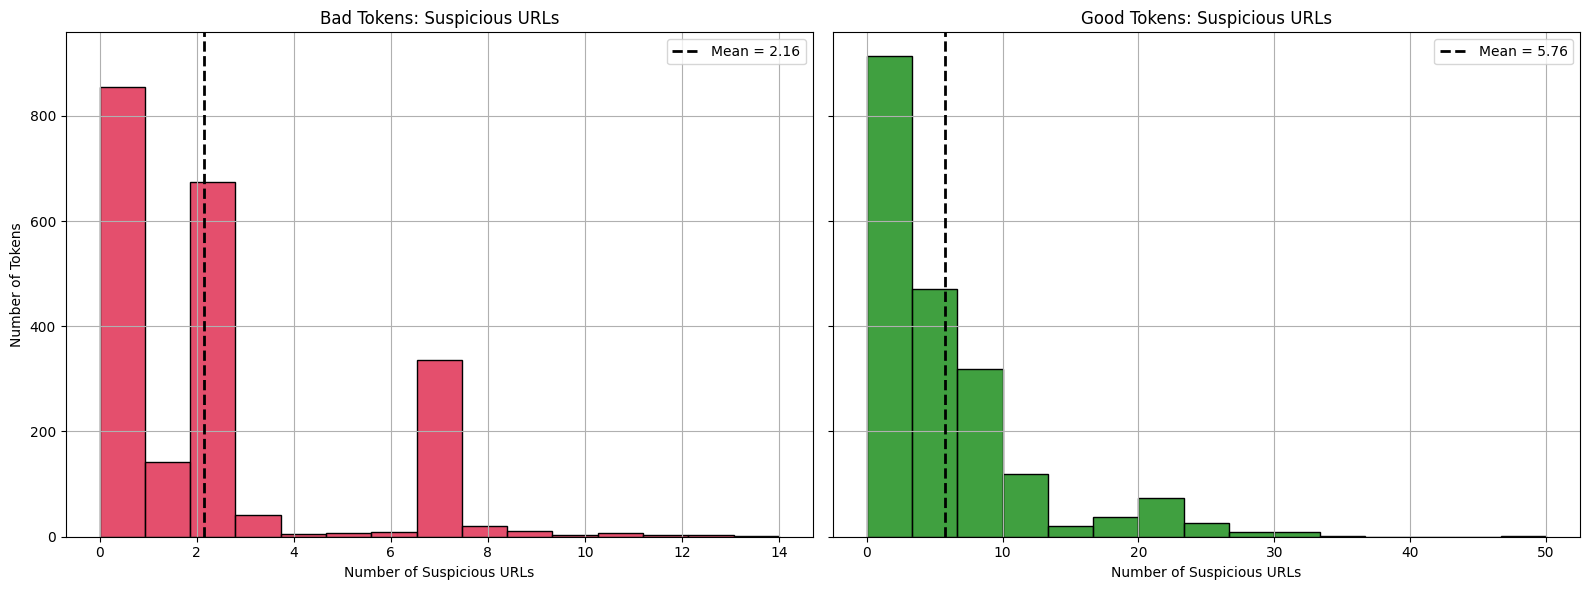

In [2]:
df_contract_bad = pd.read_csv("../csv_outputs/bad_tokens/master_security.csv")
df_contract_good = pd.read_csv("../csv_outputs/good_tokens/master_security.csv")

# Set up side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot for bad tokens
sns.histplot(
    df_contract_bad['howmany_suspicious_urls'], 
    bins=15, 
    kde=False, 
    color='crimson', 
    ax=axes[0]
)
mean_bad = df_contract_bad['howmany_suspicious_urls'].mean()
axes[0].axvline(mean_bad, color='black', linestyle='--', linewidth=2, label=f'Mean = {mean_bad:.2f}')
axes[0].set_title('Bad Tokens: Suspicious URLs')
axes[0].set_xlabel('Number of Suspicious URLs')
axes[0].set_ylabel('Number of Tokens')
axes[0].legend()
axes[0].grid(True)

# Plot for good tokens
sns.histplot(
    df_contract_good['howmany_suspicious_urls'], 
    bins=15, 
    kde=False, 
    color='green', 
    ax=axes[1]
)
mean_good = df_contract_good['howmany_suspicious_urls'].mean()
axes[1].axvline(mean_good, color='black', linestyle='--', linewidth=2, label=f'Mean = {mean_good:.2f}')
axes[1].set_title('Good Tokens: Suspicious URLs')
axes[1].set_xlabel('Number of Suspicious URLs')
axes[1].legend()
axes[1].grid(True)

# Final display
plt.tight_layout()
plt.show()

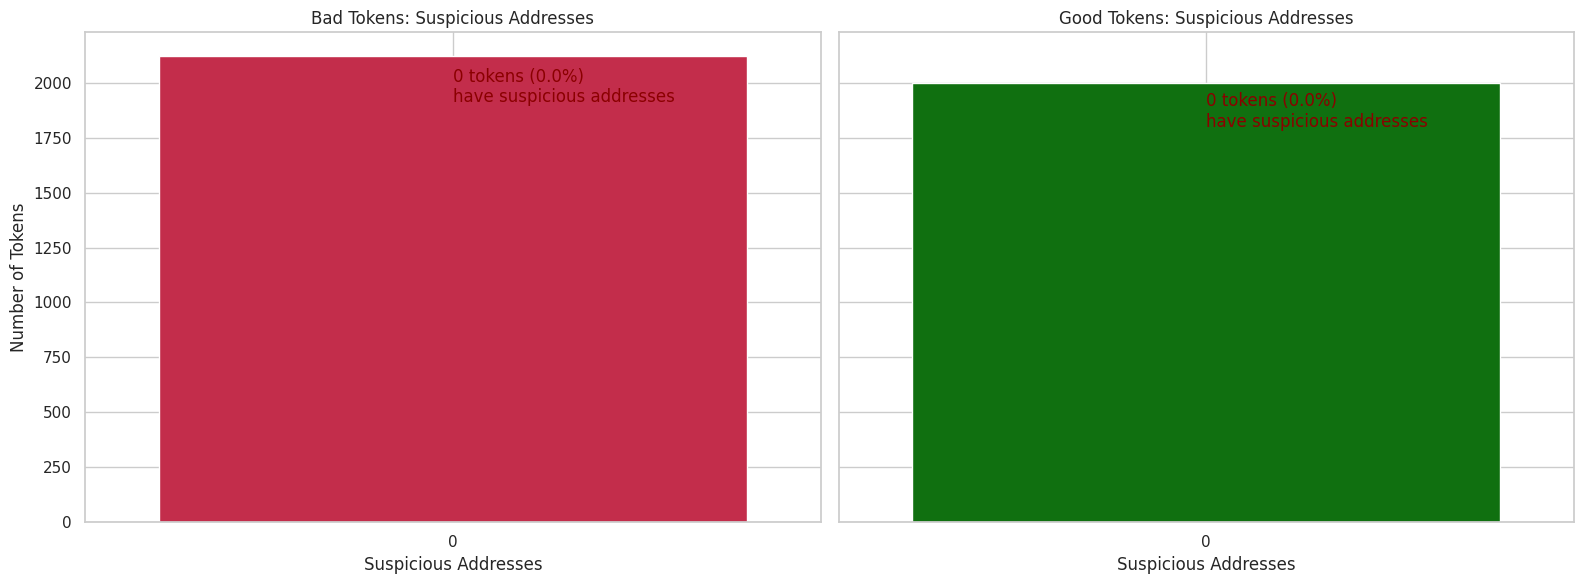

In [3]:
# Load data
df_contract_bad = pd.read_csv("../csv_outputs/bad_tokens/master_security.csv")
df_contract_good = pd.read_csv("../csv_outputs/good_tokens/master_security.csv")

# Setup plot theme
sns.set_theme(style='whitegrid')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Function to plot each dataframe
def plot_suspicious_addresses(ax, df, title, bar_color):
    # Binary flag: has at least one suspicious address
    df['has_suspicious_addresses'] = df['howmany_suspicious_addresses'] > 0

    # Count exact occurrences
    count_data = df['howmany_suspicious_addresses'].value_counts().sort_index()

    # Count how many tokens have at least one suspicious address
    num_with = df['has_suspicious_addresses'].sum()
    num_total = df.shape[0]
    percent_with = (num_with / num_total) * 100

    # Plot barplot
    sns.barplot(x=count_data.index, y=count_data.values, color=bar_color, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Suspicious Addresses')
    ax.set_ylabel('Number of Tokens')
    ax.grid(True)

    # Add annotation
    ax.text(
        x=max(count_data.index) * 0.6 if len(count_data) > 0 else 0,
        y=max(count_data.values) * 0.9 if len(count_data) > 0 else 0,
        s=f"{num_with} tokens ({percent_with:.1f}%)\nhave suspicious addresses",
        fontsize=12,
        color='darkred'
    )

# Plot bad tokens
plot_suspicious_addresses(
    ax=axes[0], 
    df=df_contract_bad.copy(), 
    title='Bad Tokens: Suspicious Addresses', 
    bar_color='crimson'
)

# Plot good tokens
plot_suspicious_addresses(
    ax=axes[1], 
    df=df_contract_good.copy(), 
    title='Good Tokens: Suspicious Addresses', 
    bar_color='green'
)

# Final layout
plt.tight_layout()
plt.show()


In [5]:
df_contract_bad['howmany_warnings']

0       0.0
1       0.0
2       0.0
3       NaN
4       0.0
       ... 
2118    0.0
2119    NaN
2120    NaN
2121    0.0
2122    0.0
Name: howmany_warnings, Length: 2123, dtype: float64

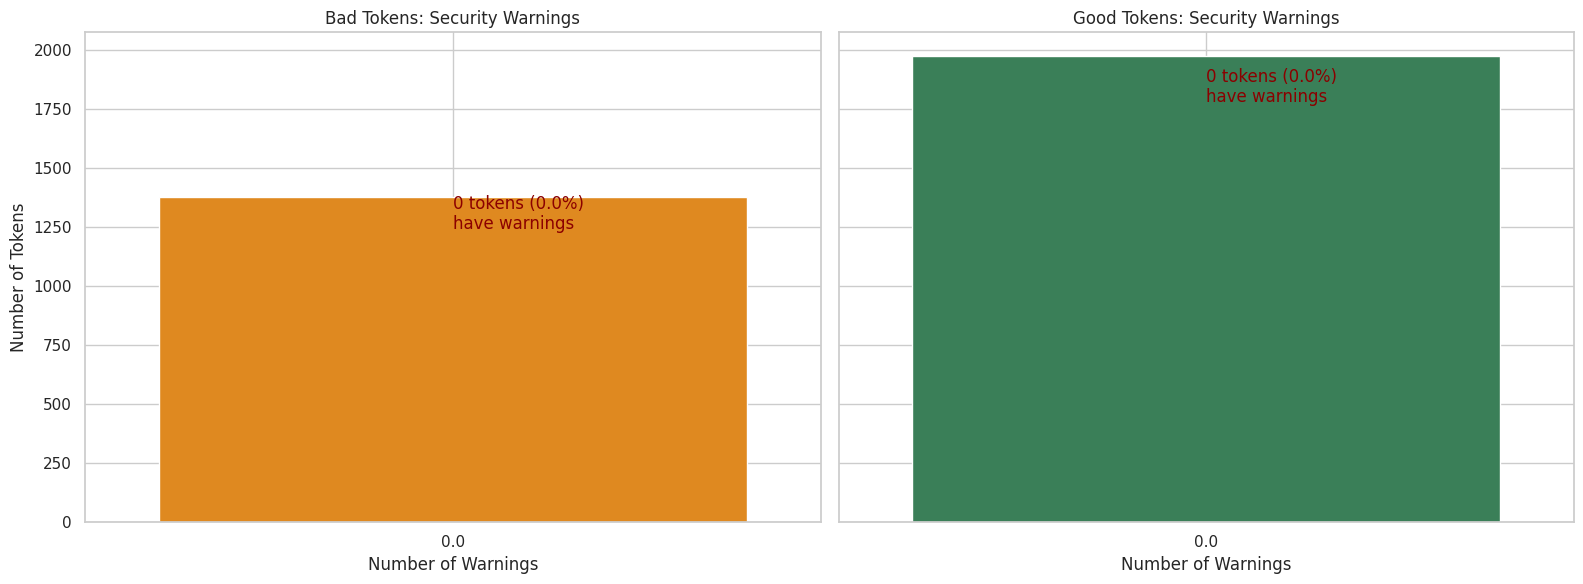

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df_contract_bad = pd.read_csv("../csv_outputs/bad_tokens/master_security.csv")
df_contract_good = pd.read_csv("../csv_outputs/good_tokens/master_security.csv")

# Set Seaborn style
sns.set_theme(style='whitegrid')

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Function to plot warnings
def plot_warnings(ax, df, title, bar_color):
    # Binary flag for having warnings
    df['has_warnings'] = df['howmany_warnings'] > 0

    # Count exact occurrences
    warning_counts = df['howmany_warnings'].value_counts().sort_index()

    # Count binary presence
    num_with = df['has_warnings'].sum()
    num_total = df.shape[0]
    percent_with = (num_with / num_total) * 100

    # Plot barplot
    sns.barplot(x=warning_counts.index, y=warning_counts.values, color=bar_color, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Number of Warnings')
    ax.set_ylabel('Number of Tokens')
    ax.grid(True)

    # Annotate
    if len(warning_counts) > 0:
        ax.text(
            x=max(warning_counts.index) * 0.6,
            y=max(warning_counts.values) * 0.9,
            s=f"{num_with} tokens ({percent_with:.1f}%)\nhave warnings",
            fontsize=12,
            color='darkred'
        )

# Plot for bad tokens
plot_warnings(
    ax=axes[0],
    df=df_contract_bad.copy(),
    title='Bad Tokens: Security Warnings',
    bar_color='darkorange'
)

# Plot for good tokens
plot_warnings(
    ax=axes[1],
    df=df_contract_good.copy(),
    title='Good Tokens: Security Warnings',
    bar_color='seagreen'
)

# Finalize layout
plt.tight_layout()
plt.show()
